# 🔍 Détection de la Fraude dans la Distribution d'Électricité et de Gaz
<img src="https://i.postimg.cc/QxGdLzps/steglapresse-850x491.jpg" alt="STEG La Presse" width="700"/>
## 🧠 Introduction au Projet
La fraude dans la distribution d’électricité et de gaz représente un défi majeur pour les fournisseurs d’énergie à l’échelle mondiale. Ces activités frauduleuses entraînent non seulement des pertes financières, mais compromettent également la fiabilité et l’efficacité des systèmes de distribution énergétique.  
Avec l’intégration des compteurs intelligents et la numérisation du secteur de l’énergie, les techniques d’analyse de données et d’apprentissage automatique sont de plus en plus utilisées pour détecter et limiter la fraude.

🎯 **Objectif** : Développer des solutions robustes basées sur l’analyse de données et le machine learning pour détecter et atténuer la fraude tout en assurant la fiabilité des réseaux.

---

## 🚨 Types Courants de Fraude

1. **Altération des compteurs** : Modification physique des compteurs pour sous-estimer la consommation.
2. **Branchements illégaux** : Connexions non autorisées aux réseaux électriques ou aux canalisations de gaz.
3. **Fraude à la facturation** : Manipulation des systèmes de facturation pour réduire le montant dû.
4. **Vol d'énergie** : Détournement direct de l’énergie sans passer par un compteur.
5. **Fraude à l’identité** : Création de comptes avec de fausses informations pour éviter la détection.

---

## ⚠️ Défis Rencontrés

1. **Qualité des données** : Données incomplètes, bruitées ou incohérentes.
2. **Scalabilité** : Traitement de grandes quantités de données provenant de millions de compteurs.
3. **Faux positifs** : Éviter les détections incorrectes tout en gardant une bonne précision.
4. **Protection de la vie privée** : Conformité avec les réglementations sur les données personnelles.
5. **Intégration aux systèmes existants** : Compatibilité avec les infrastructures anciennes.
6. **Adaptabilité** : Évolution continue des techniques de fraude nécessitant des modèles dynamiques.

---

## 📊 Techniques d’Analyse de Données & Algorithmes de Machine Learning

### Techniques d’Analyse de Données
- **Analyse descriptive** : Étude des données historiques pour détecter des anomalies.
- **Analyse prédictive** : Anticipation des fraudes potentielles à partir de comportements passés.
- **Analyse de réseau** : Cartographie des réseaux pour identifier des connexions inhabituelles.

### Algorithmes de Machine Learning

#### Apprentissage supervisé
- **Régression logistique** : Prédire la probabilité de fraude à partir de données étiquetées.
- **Forêts aléatoires (Random Forest)** : Classification efficace entre activités normales et frauduleuses.


#### Détection d’anomalies
- **Isolation Forests** : Détection d’outliers suspects.
- **SVM (Support Vector Machines)** : Identification de tendances de consommation irrégulières.

#### Deep Learning
- **Réseaux de neurones récurrents (RNN)** : Analyse de séries temporelles de consommation.
- **Réseaux de neurones convolutifs (CNN)** : Analyse des données spatiales des compteurs.

---

<h2>Importing libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from tqdm import tqdm
from sklearn.impute import SimpleImputer
import time

seed=47

# Importing Data

In [2]:
invoice_test = pd.read_csv('/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/invoice_test.csv',low_memory=False)
invoice_train = pd.read_csv('/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/invoice_train.csv',low_memory=False)
client_test = pd.read_csv('/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/client_test.csv',low_memory=False)
Client_train = pd.read_csv('/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/client_train.csv',low_memory=False)
sample_submission = pd.read_csv('/kaggle/input/fraud-detection-in-electricity-and-gas-consumption/SampleSubmission (2).csv',low_memory=False)

In [3]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [4]:
Client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [5]:
invoice_train.info()
print()
Client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        1

### Aperçu du Dataset

Dans ce projet, nous avons exploré deux ensembles de données principaux : **Invoice Train Table** et **Client Train Table**, fournissant des informations détaillées sur le comportement des clients, l’utilisation des services, et les activités potentiellement frauduleuses. Voici un résumé de ces datasets :

#### Invoice Train Table
- **Dimensions** : (4 476 749 lignes, 16 colonnes)  
- **Colonnes Clés** : `client_id`, `invoice_date`, `tarif_type`, `counter_number`, `total_consumption`, `old_index`, `new_index`, etc.  
- **Types de Données** : Principalement numériques (`int64`), avec quelques colonnes catégorielles et de dates (`object`).  
- **Objectif** : Cette table regroupe les données transactionnelles de consommation d’électricité et de gaz. Elle constitue la base pour analyser les habitudes de consommation, détecter des anomalies et identifier des tendances.

#### Client Train Table
- **Dimensions** : (135 493 lignes, 6 colonnes)  
- **Colonnes Clés** : `district`, `client_id`, `client_catg`, `region`, `creation_date`, `target`.  
- **Types de Données** : Un mélange de données catégorielles (`object`) et numériques (`int64`, `float64`).  
- **Objectif** : Ce dataset fournit des informations démographiques et catégorielles au niveau client, telles que la répartition régionale, la date de création du service, et les indicateurs de fraude (`target`).

#### Observations
1. **Taille de la Table Invoice** : La taille beaucoup plus importante de cette table reflète des données transactionnelles détaillées sur plusieurs périodes, ce qui permet une analyse temporelle fine et la détection de motifs comportementaux.
2. **Attributs Clients** : La Client Train Table complète la table des factures en ajoutant des attributs client indispensables pour la segmentation et l’analyse de la fraude.

Ces datasets offrent une vue d’ensemble complète des transactions et profils clients, servant de base pour l’ingénierie des features, la génération d’insights, et la modélisation prédictive.

# Data Cleaning and Preprocessing

In [6]:
print(Client_train.isnull().sum())

print()
print(invoice_train.isnull().sum())

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64


In [7]:
#checking relationship to merge data

# Count unique client_ids in each table
unique_clients_invoice = invoice_train['client_id'].nunique()
unique_clients_client = Client_train['client_id'].nunique()

print(f"Unique clients in invoice_train: {unique_clients_invoice}")
print(f"Unique clients in Client_train: {unique_clients_client}")

# Count the number of invoices per client
client_invoice_counts = invoice_train.groupby('client_id').size()

# Check cardinality
max_invoices_per_client = client_invoice_counts.max()
min_invoices_per_client = client_invoice_counts.min()

print(f"Maximum number of invoices per client: {max_invoices_per_client}")
print(f"Minimum number of invoices per client: {min_invoices_per_client}")

# Identify relationship type
if max_invoices_per_client == 1 :
    relationship = "One-to-One"
elif max_invoices_per_client > 1:
    relationship = "One-to-Many"
else:
    relationship = "Many-to-Many"

print(f"The relationship between Client_train and invoice_train is: {relationship}")

Unique clients in invoice_train: 135493
Unique clients in Client_train: 135493
Maximum number of invoices per client: 439
Minimum number of invoices per client: 1
The relationship between Client_train and invoice_train is: One-to-Many


In [8]:
# Merging the client and invoice data on client_id
df = pd.merge(Client_train, invoice_train, on="client_id")

In [9]:
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%d/%m/%Y', errors='coerce')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%Y-%m-%d', errors='coerce')

### Nettoyage et Prétraitement des Données

Dans les premières étapes du projet, nous avons effectué les opérations de nettoyage et de prétraitement nécessaires pour garantir la cohérence et la fiabilité de l’analyse. Voici les principales étapes réalisées :

#### Valeurs Manquantes
- Les deux datasets contiennent **des données complètes sur toutes les colonnes**, assurant une base solide sans nécessiter d’imputation ou de traitement particulier des valeurs manquantes.

#### Vérification des Relations pour Fusion
- Nous avons examiné la relation entre `Client_train` et `Invoice_train` afin de déterminer la meilleure manière de les fusionner :
  - **Clients uniques dans `invoice_train`** : 135 493  
  - **Clients uniques dans `Client_train`** : 135 493  
  - **Nombre maximal de factures par client** : 439  
  - **Nombre minimal de factures par client** : 1  
  - **Relation identifiée** : **Un-à-plusieurs**  
    - Chaque `client_id` dans `Client_train` correspond à une ou plusieurs lignes dans `Invoice_train`, rendant la relation adaptée à une fusion.

#### Logique de la Relation
- **Un-à-un** : Non applicable, certains clients ont plusieurs factures.
- **Plusieurs-à-plusieurs** : Non applicable, `client_id` est unique dans `Client_train`.
- **Un-à-plusieurs** : Relation correcte ici, chaque `client_id` est lié à plusieurs enregistrements dans `Invoice_train`.

#### Fusion des Datasets
- Les deux datasets ont été fusionnés via la clé `client_id`, ce qui a donné un dataset combiné (`df`) pour l’analyse ultérieure.

#### Correction des Incohérences de Format de Date
- Les colonnes `invoice_date` et `creation_date` avaient des formats de date incohérents.
- Ces formats ont été standardisés afin d’assurer la cohérence temporelle, permettant des analyses précises sur la durée de vie client, les écarts entre factures, ou encore la saisonnalité.

En garantissant la propreté et la cohérence des données, nous avons posé les bases pour une ingénierie des features fiable et des analyses pertinentes.

In [10]:
df['total_consumption'] = df[['consommation_level_1', 'consommation_level_2', 
                               'consommation_level_3', 'consommation_level_4']].sum(axis=1)

In [11]:
df['invoice_year'] = df['invoice_date'].dt.year
df['invoice_month'] = df['invoice_date'].dt.month
df['creation_year'] = df['creation_date'].dt.year
df['creation_day_of_week'] = pd.to_datetime(df['creation_date']).dt.dayofweek  
df['invoice_quarter'] = pd.to_datetime(df['invoice_date']).dt.to_period('Q')  

# Find the most recent invoice date for each client
df['most_recent_invoice_date'] = df.groupby('client_id')['invoice_date'].transform('max')

# Invoice Gap
df['invoice_gap'] = (pd.to_datetime(df['most_recent_invoice_date'])- pd.to_datetime(df['invoice_date'])).dt.days

# Calculate client age as the difference between the most recent invoice date and the creation date
df['client_age_in_Days'] = (df['most_recent_invoice_date'] - df['creation_date']).dt.days

#Consumption Difference:
df['consumption_diff'] = df['new_index'] - df['old_index']

# Client Category Fraud Rate
client_catg_fraud_rate = df.groupby('client_catg')['target'].mean().to_dict()
df['client_catg_fraud_rate'] = df['client_catg'].map(client_catg_fraud_rate)

# Fraud Risk Flag
df['high_risk'] = (df['client_catg_fraud_rate'] > 0.7)

# Client Lifetime Buckets
df['client_lifetime_bucket'] = pd.cut(df['client_age_in_Days'], bins=[0, 365, 1825, 3650, np.inf],
                                      labels=['<1 Year', '1-5 Years', '5-10 Years', '>10 Years'])

# Vue d’Ensemble de l’Activité et Insights Clients

- Répartition Proportionnelle des Services Énergétiques  
- Nombre de Clients Gaz et Électricité dans le Temps  
- Répartition Régionale des Clients  
- Segmentation des Clients selon le Tarif  
- Consommation Moyenne selon les Tarifs  
- Distribution de la Durée de Vie Client

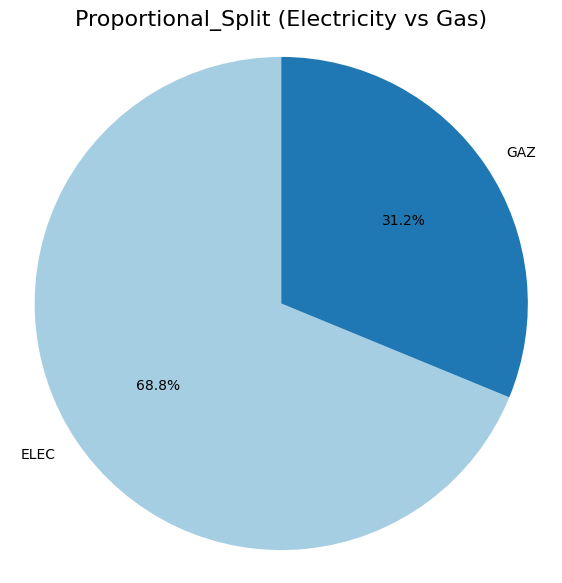

In [12]:
Proportional_Split = df['counter_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(Proportional_Split, labels=Proportional_Split.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportional_Split (Electricity vs Gas)', fontsize=16)
plt.axis('equal') 
plt.show()

### Répartition Proportionnelle de l'Énergie : Électricité vs Gaz

#### Aperçu
Le graphique circulaire illustre la répartition proportionnelle de la distribution d’énergie entre l’électricité et le gaz.

#### Principaux Constats

1. **Domination de l'Électricité**  
   - L’électricité représente **68,8%** de la distribution totale, en faisant le service principal de l’entreprise.

2. **Part du Gaz**  
   - Le gaz représente **31,2%**, ce qui reste une part significative mais inférieure à celle de l’électricité.

#### Implications

- **Priorité Stratégique** : Cette dominance suggère une concentration des ressources et de la stratégie autour de l’électricité.
- **Opportunité de Croissance** : La part plus faible du gaz peut être ciblée pour des campagnes marketing ou une extension des services.
- **Portefeuille Énergétique Équilibré** : Malgré la prédominance de l’électricité, le gaz reste un pilier important à ne pas négliger.

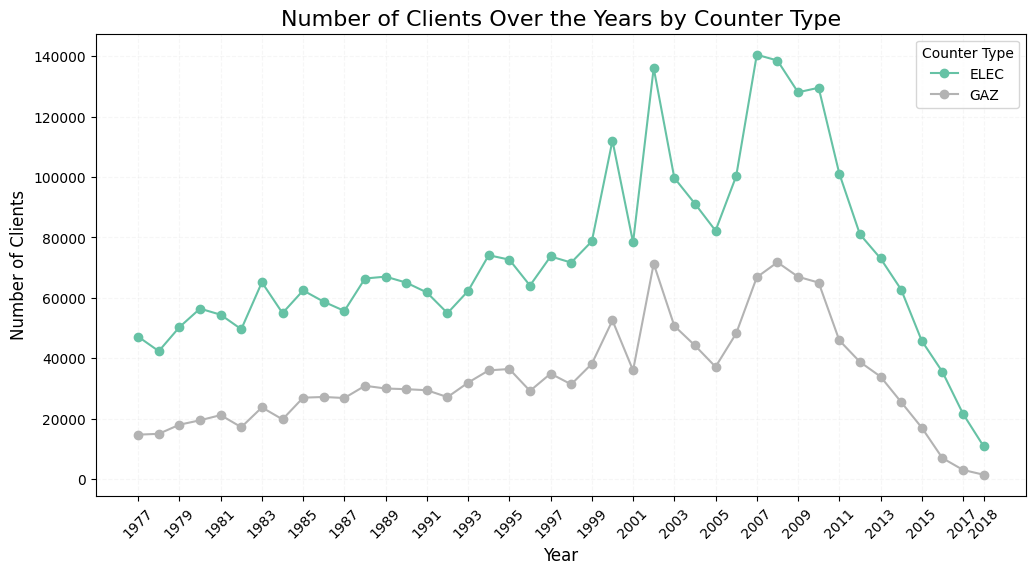

In [13]:
# Filter out the year 2019
df_filtered = df[df['creation_year'] < 2019]

# Group by creation_year and counter_type, then count the number of clients
customers_by_year = df_filtered.groupby(['creation_year', 'counter_type']).size().unstack(fill_value=0)

# Plot the data
ax = customers_by_year.plot(kind='line', figsize=(12, 6), colormap="Set2", marker='o')

# Add title and labels
plt.title('Number of Clients Over the Years by Counter Type', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.legend(title='Counter Type')
plt.grid(True, linestyle='--', alpha=0.1)

# Adjust X-axis to show every second year with 45-degree rotation
years_to_show = customers_by_year.index[::2].tolist()  # Display every second year
years_to_show.append(customers_by_year.index[-1])  # Add the last year

ax.set_xticks(years_to_show)  # Set the ticks to the selected years
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Évolution des Clients pour le Gaz et l'Électricité au Fil des Ans

#### Aperçu
Ce graphique illustre l’évolution du nombre de clients pour les services de gaz et d’électricité au fil des années. Pour assurer une comparaison équitable, l’année 2019 a été exclue en raison de l’absence de données clients.

#### Principaux Constats

1. **Tendances Générales de Croissance et de Déclin**  
   - **Électricité** : Augmentation continue jusqu’en **2007**, atteignant un pic de **140 549 clients**, suivie d’un déclin progressif, avec une chute marquée après **2010**. En **2018**, seuls **10 793 clients** étaient recensés.
   - **Gaz** : Croissance régulière jusqu’en **2008** (pic à **71 774 clients**), suivie d’un déclin fort, avec **1 381 clients** en **2018**.

2. **Périodes de Forte Croissance**  
   - Entre **1999 et 2007**, une adoption massive a été constatée pour les deux services, probablement liée à l’élargissement de la couverture ou à une forte demande.

3. **Déclin Brutal Après 2010**  
   - Les deux services enregistrent une forte baisse de clientèle après **2010**, possiblement due à des facteurs économiques ou l’émergence d’alternatives énergétiques.

4. **Domination de l'Électricité**  
   - Tout au long de la période analysée, le nombre de clients pour l’électricité reste largement supérieur à celui du gaz.

5. **Changement Marquant Après 2016**  
   - Déclin encore plus prononcé après **2016**, suggérant une saturation du marché ou des changements dans les politiques énergétiques.

#### Implications
Cette analyse historique aide à comprendre les dynamiques d’adoption des services énergétiques et à orienter les décisions pour les futures stratégies d’expansion et d’amélioration.

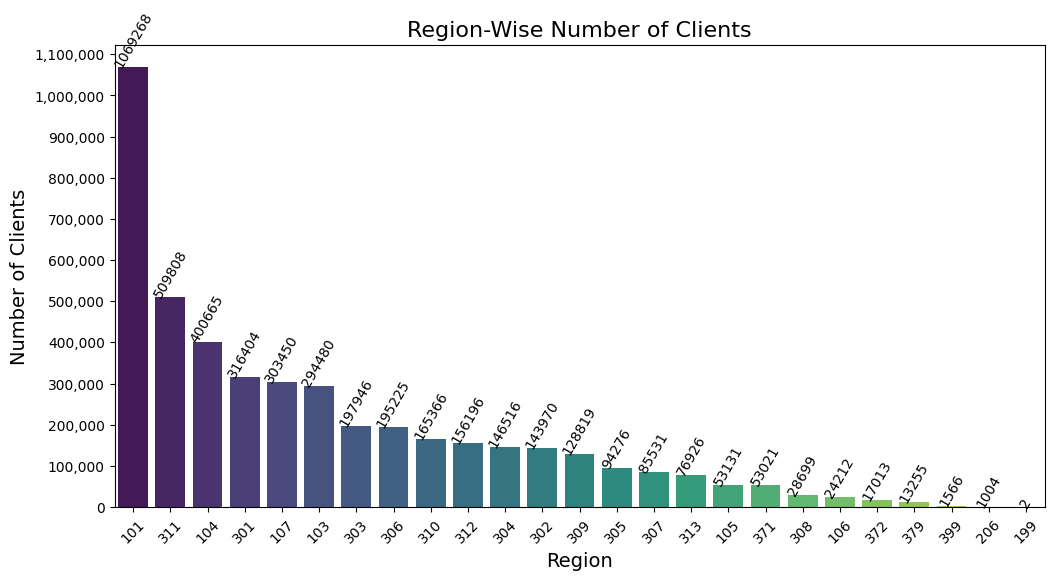

In [14]:
# Get region-wise client count
region_client_count = df['region'].value_counts().sort_values(ascending=False)

# Plot region-wise number of clients
plt.figure(figsize=(12, 6))
sns.barplot(x=region_client_count.index, y=region_client_count.values, palette="viridis",order=region_client_count.index)

# Set Y-axis ticks to the nearest 100,000
step_size = 100000  
max_count = region_client_count.max()
plt.yticks(range(0, max_count + step_size, step_size))

# Format Y-axis labels as integers with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Data labels on each bar
for i, value in enumerate(region_client_count.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10, rotation = 60)

plt.title('Region-Wise Number of Clients', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Répartition Régionale des Clients

#### Aperçu
Ce graphique en barres met en évidence la répartition des clients selon les différentes régions, offrant une vision claire de l’utilisation énergétique régionale et de la densité des clients. Les données révèlent des disparités importantes, utiles pour orienter l’allocation des ressources et la planification des services.

#### Principaux Constats

1. **Régions avec le Plus Grand Nombre de Clients**  
   - **Région 101** : Domine avec environ **1,07 million de clients**, représentant la plus forte densité.  
   - **Région 311** : Suit avec environ **510 000 clients**.  
   - **Région 104** : Arrive en troisième position avec près de **401 000 clients**.

2. **Régions à Densité Moyenne**  
   - Les régions **301, 107, 103, 303 et 306** comptent entre **195 000 et 316 000 clients**.

3. **Régions avec Moins de Clients**  
   - Les régions **105, 371, 308 et 106** affichent une clientèle significativement plus faible, entre **24 000 et 94 000 clients**.  
   - **Région 199** et **Région 206** sont les moins peuplées en clients, avec respectivement **2** et **1 004 clients**.

#### Implications
Cette répartition régionale permet d’identifier les zones à fort potentiel de croissance, celles nécessitant des campagnes ciblées, ou encore les régions denses à optimiser pour améliorer l’efficacité et la satisfaction client.

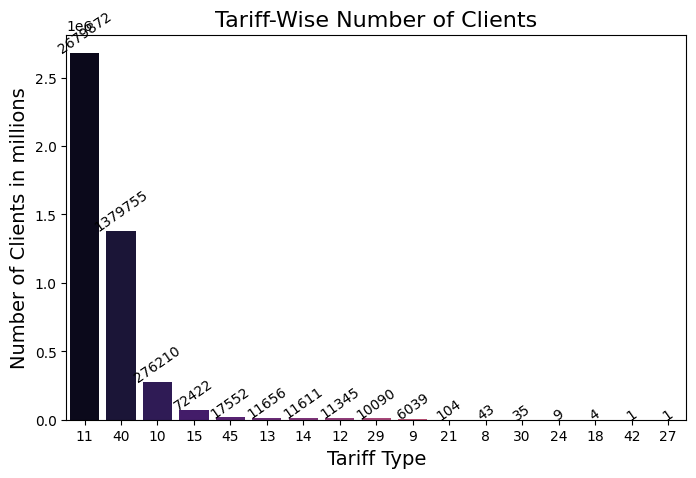

In [15]:
# Plot tariff-wise number of clients
tariff_client_count = df['tarif_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=tariff_client_count.index, y=tariff_client_count.values, palette="magma" ,order=tariff_client_count.index)
plt.title('Tariff-Wise Number of Clients', fontsize=16)
plt.xlabel('Tariff Type', fontsize=14)
plt.ylabel('Number of Clients in millions', fontsize=14)

# Show value labels on each bar
for i, value in enumerate(tariff_client_count.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=10, rotation = 35)
    
plt.show()

### Répartition des Clients par Type de Tarif

#### Aperçu
Ce graphique en barres affiche le nombre de clients segmentés selon le type de tarif, offrant une vue sur la popularité et l’utilisation des différents plans tarifaires.

#### Principaux Constats

1. **Types de Tarifs les Plus Populaires**  
   - **Type de Tarif 11** : Enregistre le plus grand nombre de clients, avec environ **2,68 millions**.  
   - **Type de Tarif 40** : Suit avec environ **1,38 million de clients**.  
   - Ces deux types dominent largement le dataset, regroupant la majorité des clients.

2. **Types de Tarifs à Utilisation Modérée**  
   - **Type de Tarif 10** : Environ **276 000 clients**, indiquant une utilisation intermédiaire.  
   - **Type de Tarif 15** : Environ **72 000 clients**, montrant une adoption de niche.

3. **Types de Tarifs les Moins Utilisés**  
   - **Types 45, 13, 14 et 12** : Entre **10 000 et 18 000 clients**, montrant une utilisation limitée.  
   - D’autres types (**21, 8, 30, 24, 18, 42, 27**) sont très peu adoptés, certains ayant moins de **50 clients**.

4. **Observations Remarquables**  
   - Un fort contraste entre les deux premiers types de tarifs et le reste, révélant une concentration dans quelques plans.  
   - La présence de nombreux tarifs de niche avec peu de clients suggère des services spécialisés ou des plans anciens.

#### Implications
Cette répartition met en lumière des pistes d’optimisation :  
- **Tarifs Populaires** : Renforcer l’infrastructure et les services pour les plans très demandés (ex. : Types 11 et 40).  
- **Tarifs Faiblement Utilisés** : Explorer les raisons de la faible adoption (coût, disponibilité, communication) et envisager un ajustement ou un repositionnement.

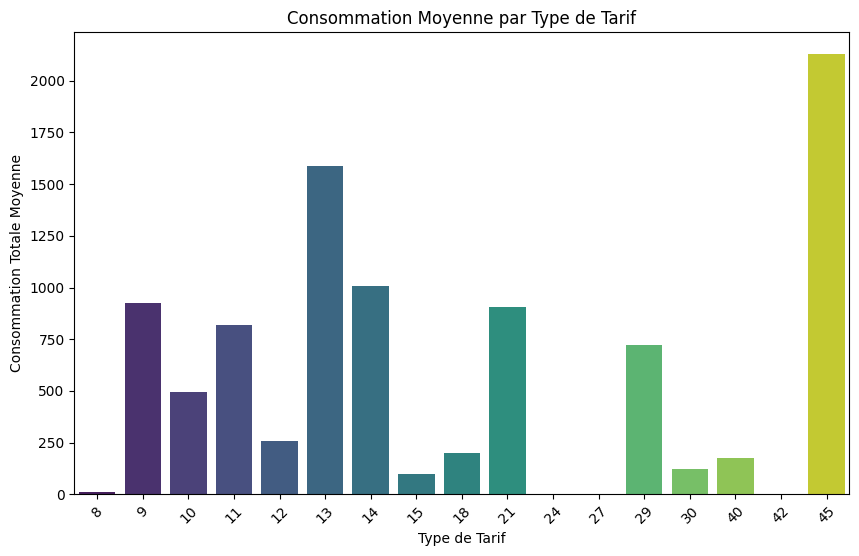

In [16]:
# Regroupement par type de tarif et calcul de la consommation moyenne totale
avg_consumption_by_tariff = df.groupby('tarif_type')['total_consumption'].mean().reset_index()

# Tracé de la consommation moyenne par type de tarif
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_consumption_by_tariff, x='tarif_type', y='total_consumption', palette='viridis')
plt.title("Consommation Moyenne par Type de Tarif")
plt.xlabel("Type de Tarif")
plt.ylabel("Consommation Totale Moyenne")
plt.xticks(rotation=45)
plt.show()

### Consommation Moyenne par Type de Tarif
#### Aperçu
Ce graphique en barres illustre la consommation énergétique moyenne associée à chaque type de tarif, mettant en évidence les variations de niveaux de consommation selon les offres tarifaires.
#### Principaux Constats
1. **Tarifs à Forte Consommation**  
   - **Type de Tarif 45** : Affiche la consommation la plus élevée, contribuant fortement à la consommation totale.  
   - **Type de Tarif 13** : Suit de près le type 45 avec une consommation importante.
2. **Tarifs à Consommation Modérée**  
   - **Types de Tarifs 9, 11, 14 et 21** : Présentent des niveaux de consommation intermédiaires.  
   - **Type de Tarif 29** : Affiche également une consommation modérée, mais inférieure aux précédents.
3. **Tarifs à Faible Consommation**  
   - **Types 10, 12 et 18** : Montrent une consommation relativement faible, suggérant une utilisation restreinte.  
   - **Types 15, 8 et 30** : Enregistrent une consommation minimale, indiquant des usages de niche.
4. **Tarifs à Consommation Nulle**  
   - **Types 24, 27 et 42** : N’observent aucune consommation, possiblement des offres obsolètes ou très peu adoptées.
#### Implications
- **Concentration sur les Tarifs à Forte Consommation** : Garantir une infrastructure robuste pour ces plans.  
- **Étude des Tarifs Faible/Nulle** : Comprendre la faible adoption et envisager réajustements ou rebranding.  
- **Optimisation des Tarifs Modérés** : Explorer des leviers pour augmenter leur adoption.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


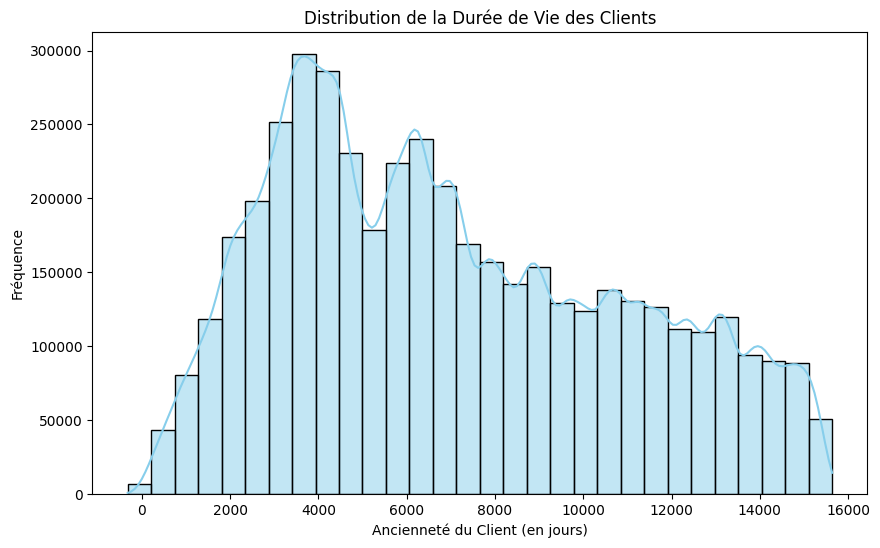

In [17]:
# Distribution de la durée de vie des clients
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='client_age_in_Days', bins=30, kde=True, color='skyblue')
plt.title("Distribution de la Durée de Vie des Clients")
plt.xlabel("Ancienneté du Client (en jours)")
plt.ylabel("Fréquence")
plt.show()

### Distribution de l’Âge des Clients
#
L’histogramme montre la répartition de l’ancienneté des clients en jours. La majorité se situe entre **2 000 et 8 000 jours**, témoignant d’une base importante de clients de moyen à long terme. Au-delà de **8 000 jours**, le nombre décroît progressivement jusqu’à **15 000 jours**, indiquant moins de très anciens clients.

# Analyse et Insights sur la Fraude
- Répartition Fraude vs Non-Fraude  
- Distribution des cas de fraude par région  
- Répartition de la fraude entre Électricité et Gaz  
- Évolution de la fraude Élec/Gaz au fil des années  
- Nombre moyen de cas de fraude par mois pour Élec et Gaz  
- Parcours de consommation : Clients frauduleux, non-frauduleux et moyenne générale

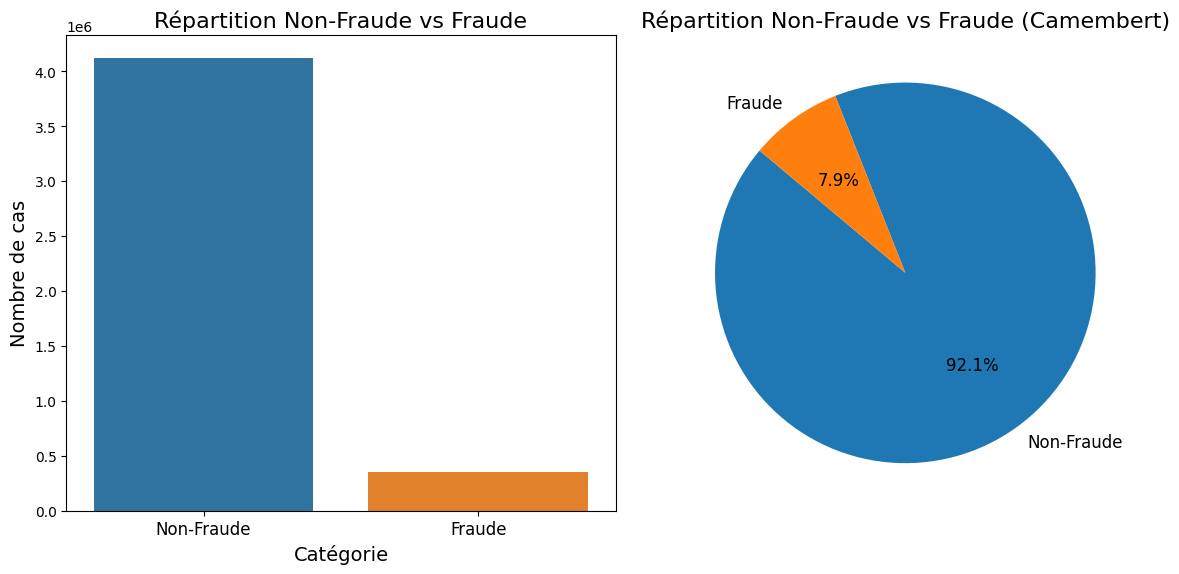

Clients Non-Fraude : 4123637
Clients Fraude     : 353112


In [18]:
# Répartition des cas de fraude et non-fraude
fraud_count = df['target'].value_counts()
labels = ['Non-Fraude', 'Fraude']
sizes = fraud_count.values

plt.figure(figsize=(12, 6))

# Histogramme Fraude vs Non-Fraude
plt.subplot(1, 2, 1)
sns.countplot(x='target', data=df)
plt.title('Répartition Non-Fraude vs Fraude', fontsize=16)
plt.xticks([0, 1], ['Non-Fraude', 'Fraude'], fontsize=12)
plt.ylabel('Nombre de cas', fontsize=14)
plt.xlabel('Catégorie', fontsize=14)

# Diagramme circulaire Fraude vs Non-Fraude
plt.subplot(1, 2, 2)
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12},
)
plt.title('Répartition Non-Fraude vs Fraude (Camembert)', fontsize=16)

plt.tight_layout()
plt.show()

# Affichage du nombre exact de cas
print("Clients Non-Fraude :", fraud_count.get(0, 0))
print("Clients Fraude     :", fraud_count.get(1, 0))

### Interprétation : Répartition Non-Fraude vs Fraude
#
L’histogramme et le camembert montrent un déséquilibre marqué :  
- **Cas Non-Fraude **: 4 123 637 (92,1 %)  
- **Cas Fraude     **:   353 112 (7,9 %)  
#
Cet écart important souligne la nécessité d’ajuster les modèles ML (ex. SMOTE, undersampling, algorithmes sensibles au déséquilibre).

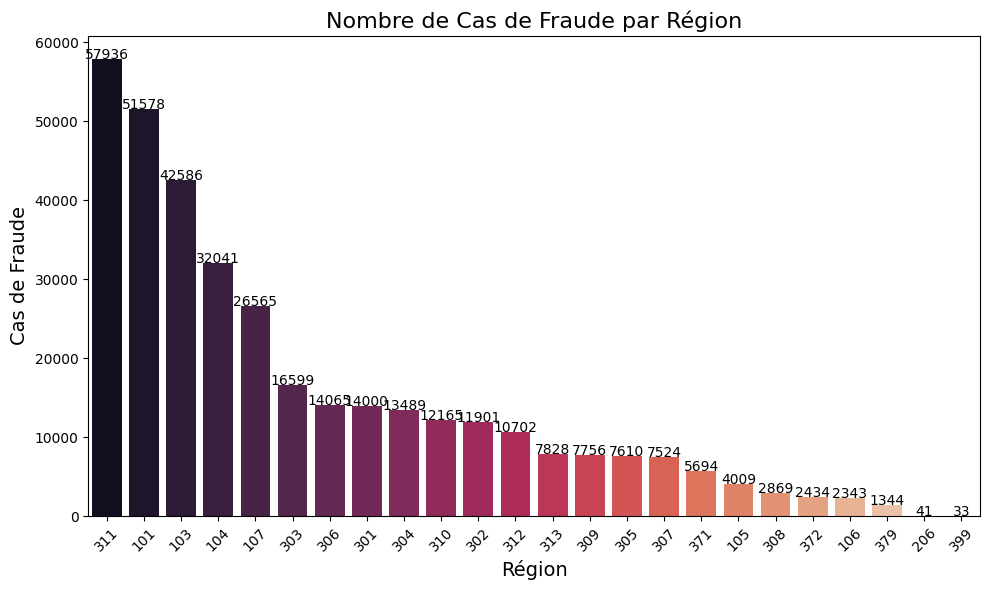

In [19]:
# Distribution des cas de fraude par région
fraud_cases_region = df[df['target'] == 1].groupby('region').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_cases_region.index, y=fraud_cases_region.values, palette="rocket", order=fraud_cases_region.index)
plt.title('Nombre de Cas de Fraude par Région', fontsize=16)
plt.xlabel('Région', fontsize=14)
plt.ylabel('Cas de Fraude', fontsize=14)

for i, v in enumerate(fraud_cases_region.values):
    plt.text(i, v + 1, str(v), ha='center', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Répartition Régionale de la Fraude
#
- **Région 311** : 57 936 cas  
- **Région 101** : 51 578 cas  
- **Région 103** : 42 586 cas  
#
Certaines régions présentent des taux de fraude nettement plus élevés et nécessitent des actions ciblées.

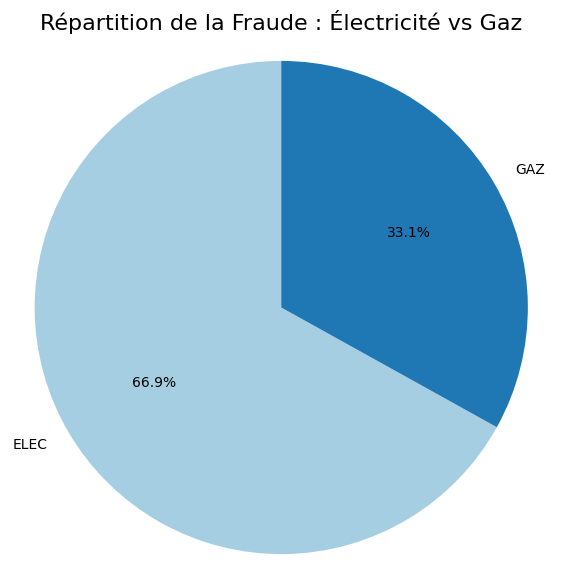

In [20]:
# Répartition de la fraude entre Électricité et Gaz
fraud_data = df[df['target'] == 1]
fraud_distribution = fraud_data['counter_type'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(fraud_distribution, labels=fraud_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Répartition de la Fraude : Électricité vs Gaz', fontsize=16)
plt.axis('equal')
plt.show()

### Répartition de la Fraude par Service
#
- **Électricité **: 66,9 % des cas  
- **Gaz         **: 33,1 % des cas  
#
La fraude est majoritairement localisée sur l’électricité.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

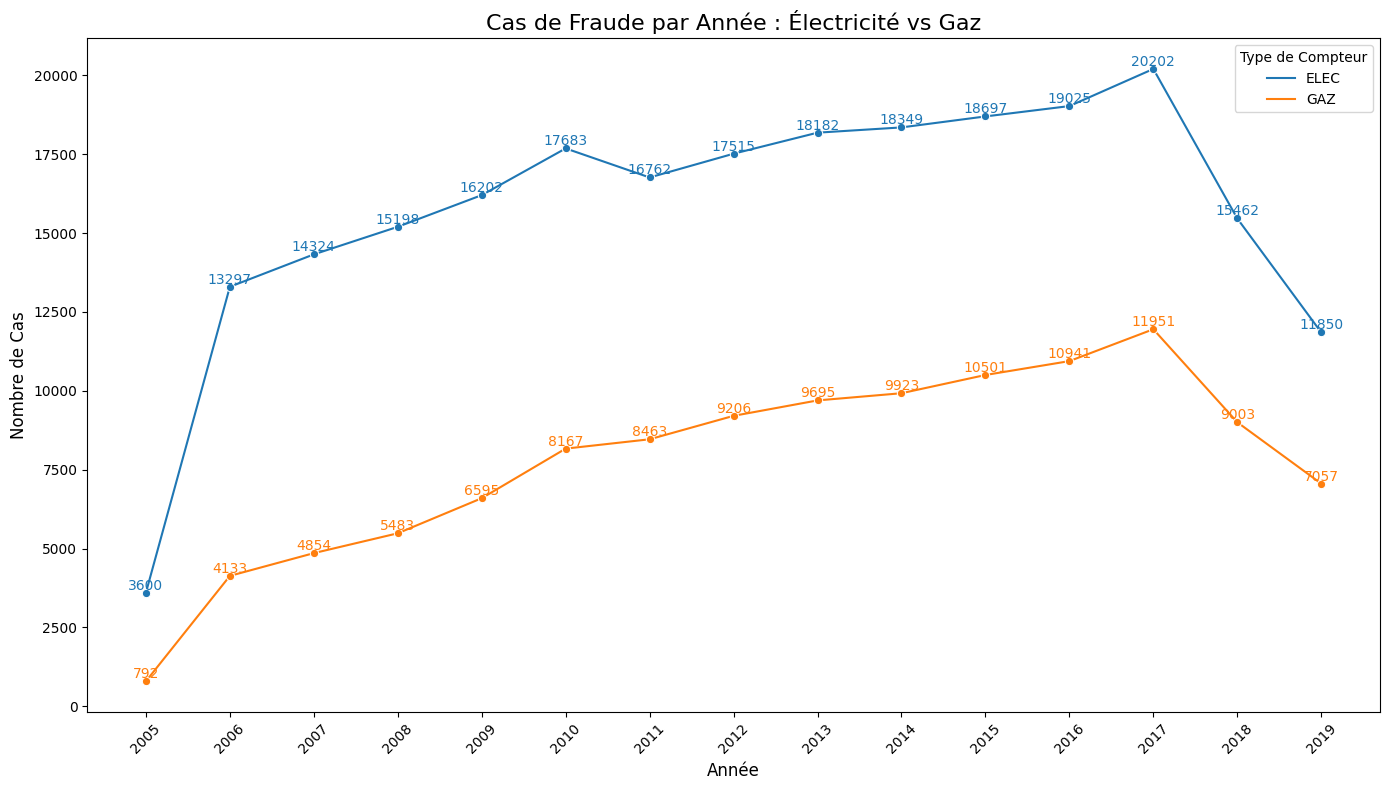

In [21]:
# Évolution de la fraude Élec/Gaz par année
fraud_cases = df[df['target'] == 1].copy()
fraud_cases['year']  = fraud_cases['invoice_date'].dt.year.astype(str)

fd = fraud_cases.groupby(['counter_type', 'year']).size().reset_index(name='fraud_count')
fd = fd[fd['counter_type'].isin(['ELEC', 'GAZ'])]

plt.figure(figsize=(14, 8))
sns.lineplot(data=fd, x='year', y='fraud_count', hue='counter_type', marker='o')

for line in plt.gca().get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, str(int(y)), color=line.get_color(), ha='center', va='bottom', fontsize=10)

plt.title('Cas de Fraude par Année : Électricité vs Gaz', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de Cas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type de Compteur')
plt.tight_layout()
plt.show()

### Évolution Annuelle de la Fraude
#
- Pic en **2017** (Élec : 20 202 ; Gaz : 11 951)  
- Baisse après 2017 (Élec : 11 850 en 2019 ; Gaz : 7 057 en 2019)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

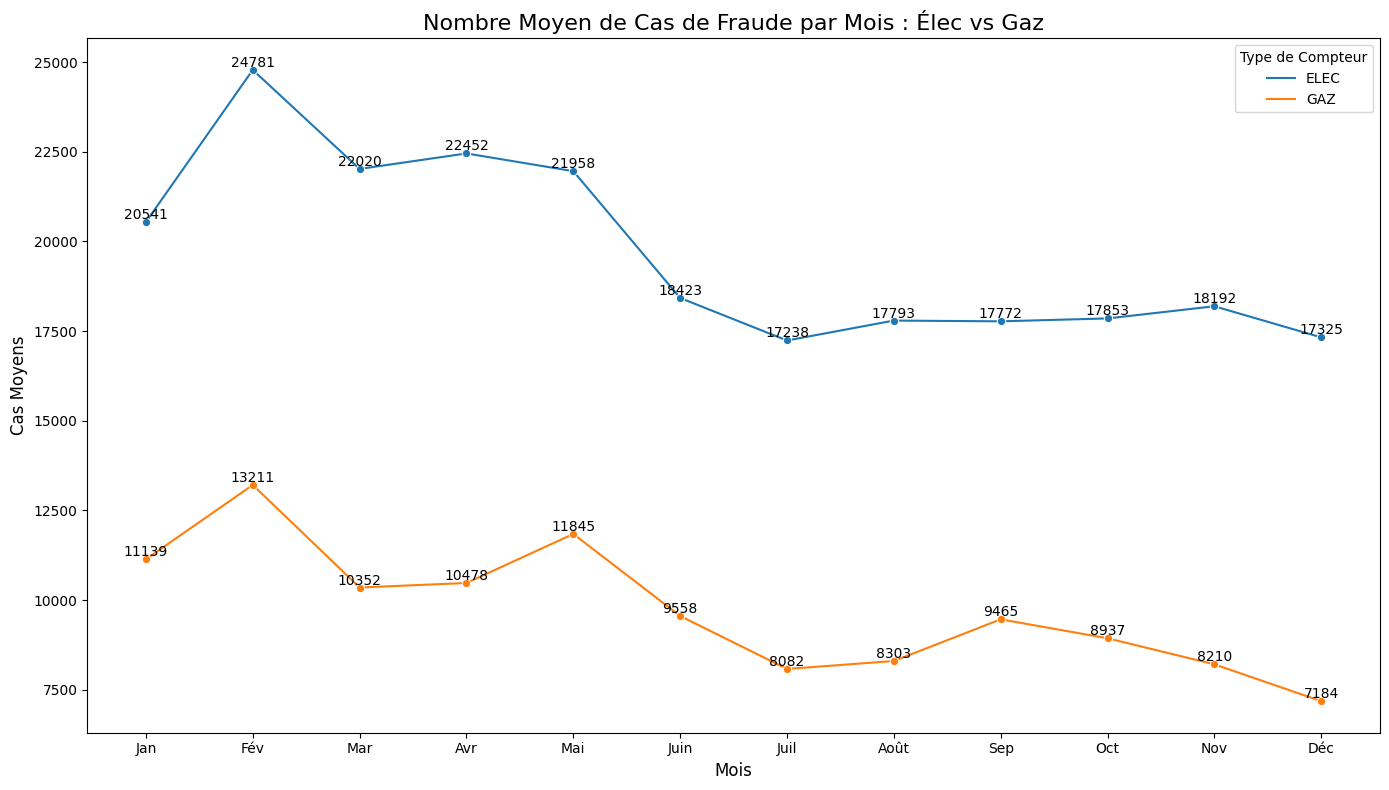

In [22]:
# Moyenne mensuelle des cas de fraude
fraud_cases['month'] = fraud_cases['invoice_date'].dt.month

monthly_fraud = fraud_cases.groupby(['counter_type','month']).size().reset_index(name='fraud_count')
monthly_fraud_avg = monthly_fraud.groupby(['counter_type','month'])['fraud_count'].mean().reset_index(name='avg_fraud_count')

plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_fraud_avg, x='month', y='avg_fraud_count', hue='counter_type', marker='o')

for line in plt.gca().get_lines():
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{int(round(y))}', color='black', ha='center', va='bottom', fontsize=10)

plt.title('Nombre Moyen de Cas de Fraude par Mois : Élec vs Gaz', fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Cas Moyens', fontsize=12)
plt.xticks(ticks=range(1,13), labels=['Jan','Fév','Mar','Avr','Mai','Juin','Juil','Août','Sep','Oct','Nov','Déc'])
plt.legend(title='Type de Compteur')
plt.tight_layout()
plt.show()

### Tendances Mensuelles de la Fraude
#
- **Février **: pic (Élec : 1 652 ; Gaz : 881)  
- Baisses marquées de juin à décembre.

Client Fraude : train_Client_125420 — Client Honnête : train_Client_72532


/tmp/ipykernel_13/1667474214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['month']=d['invoice_date'].dt.month


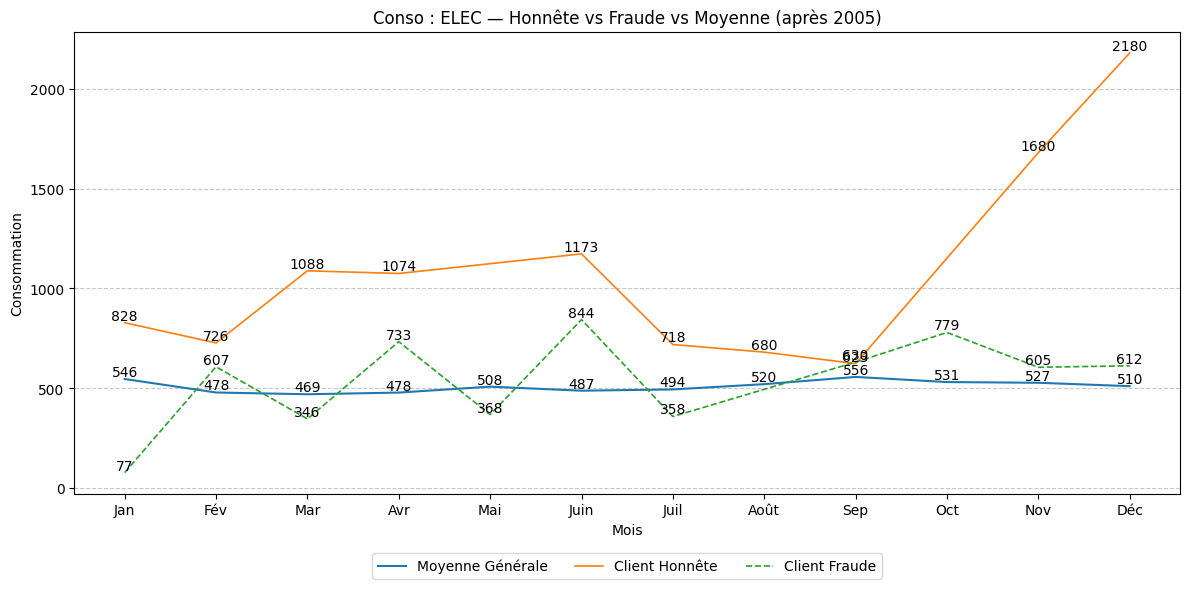

/tmp/ipykernel_13/1667474214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['month']=d['invoice_date'].dt.month


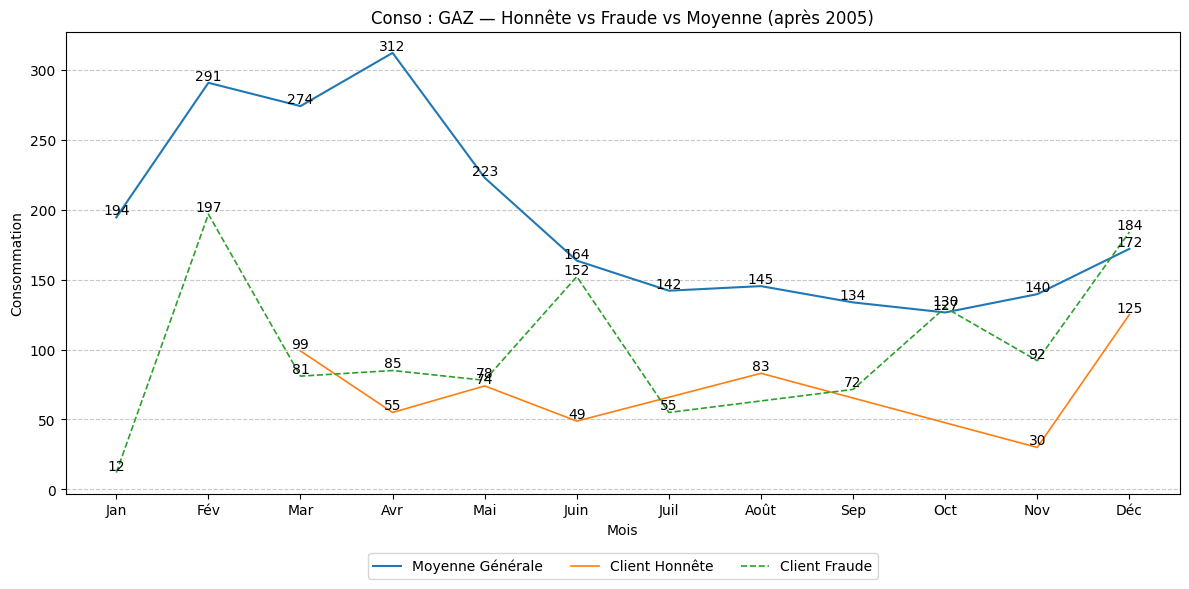

In [23]:
# Comparaison conso clients honnêtes vs fraudeurs vs moyenne
def compare_consumption():
    fraud_id = 'train_Client_125420'
    honest_id= 'train_Client_72532'
    print(f"Client Fraude : {fraud_id} — Client Honnête : {honest_id}")

    df2005 = df[df['invoice_date'] >= "2005-01-01"]

    def plot_ct(ct):
        d = df2005[df2005['counter_type']==ct]
        d['month']=d['invoice_date'].dt.month
        avg_all       = d.groupby('month')['consommation_level_1'].mean().reset_index()
        avg_honest    = d[d['client_id']==honest_id].groupby('month')['consommation_level_1'].mean().reset_index()
        avg_fraud     = d[d['client_id']==fraud_id].groupby('month')['consommation_level_1'].mean().reset_index()

        plt.figure(figsize=(12,6))
        plt.plot(avg_all['month'], avg_all['consommation_level_1'], label="Moyenne Générale", linewidth=1.5)
        plt.plot(avg_honest['month'], avg_honest['consommation_level_1'], label="Client Honnête", linewidth=1.2)
        plt.plot(avg_fraud['month'], avg_fraud['consommation_level_1'], label="Client Fraude", linestyle="--", linewidth=1.2)

        for line in plt.gca().get_lines():
            for x,y in zip(line.get_xdata(), line.get_ydata()):
                plt.text(x, y, f'{int(round(y))}', ha='center', va='bottom', fontsize=10)

        plt.xticks(range(1,13), ['Jan','Fév','Mar','Avr','Mai','Juin','Juil','Août','Sep','Oct','Nov','Déc'])
        plt.title(f"Conso : {ct} — Honnête vs Fraude vs Moyenne (après 2005)")
        plt.xlabel("Mois"); plt.ylabel("Consommation")
        plt.legend(loc="lower center", bbox_to_anchor=(0.5,-0.2), ncol=3)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    plot_ct("ELEC")
    plot_ct("GAZ")

compare_consumption()

### Parcours Clients : Honnête vs Frauduleux vs Moyenne
Le client fraude présente un pattern irrégulier (« zigzag ») comparé à la moyenne et au client honnête, illustrant l’anomalie de consommation.